## Cascade classifier for image

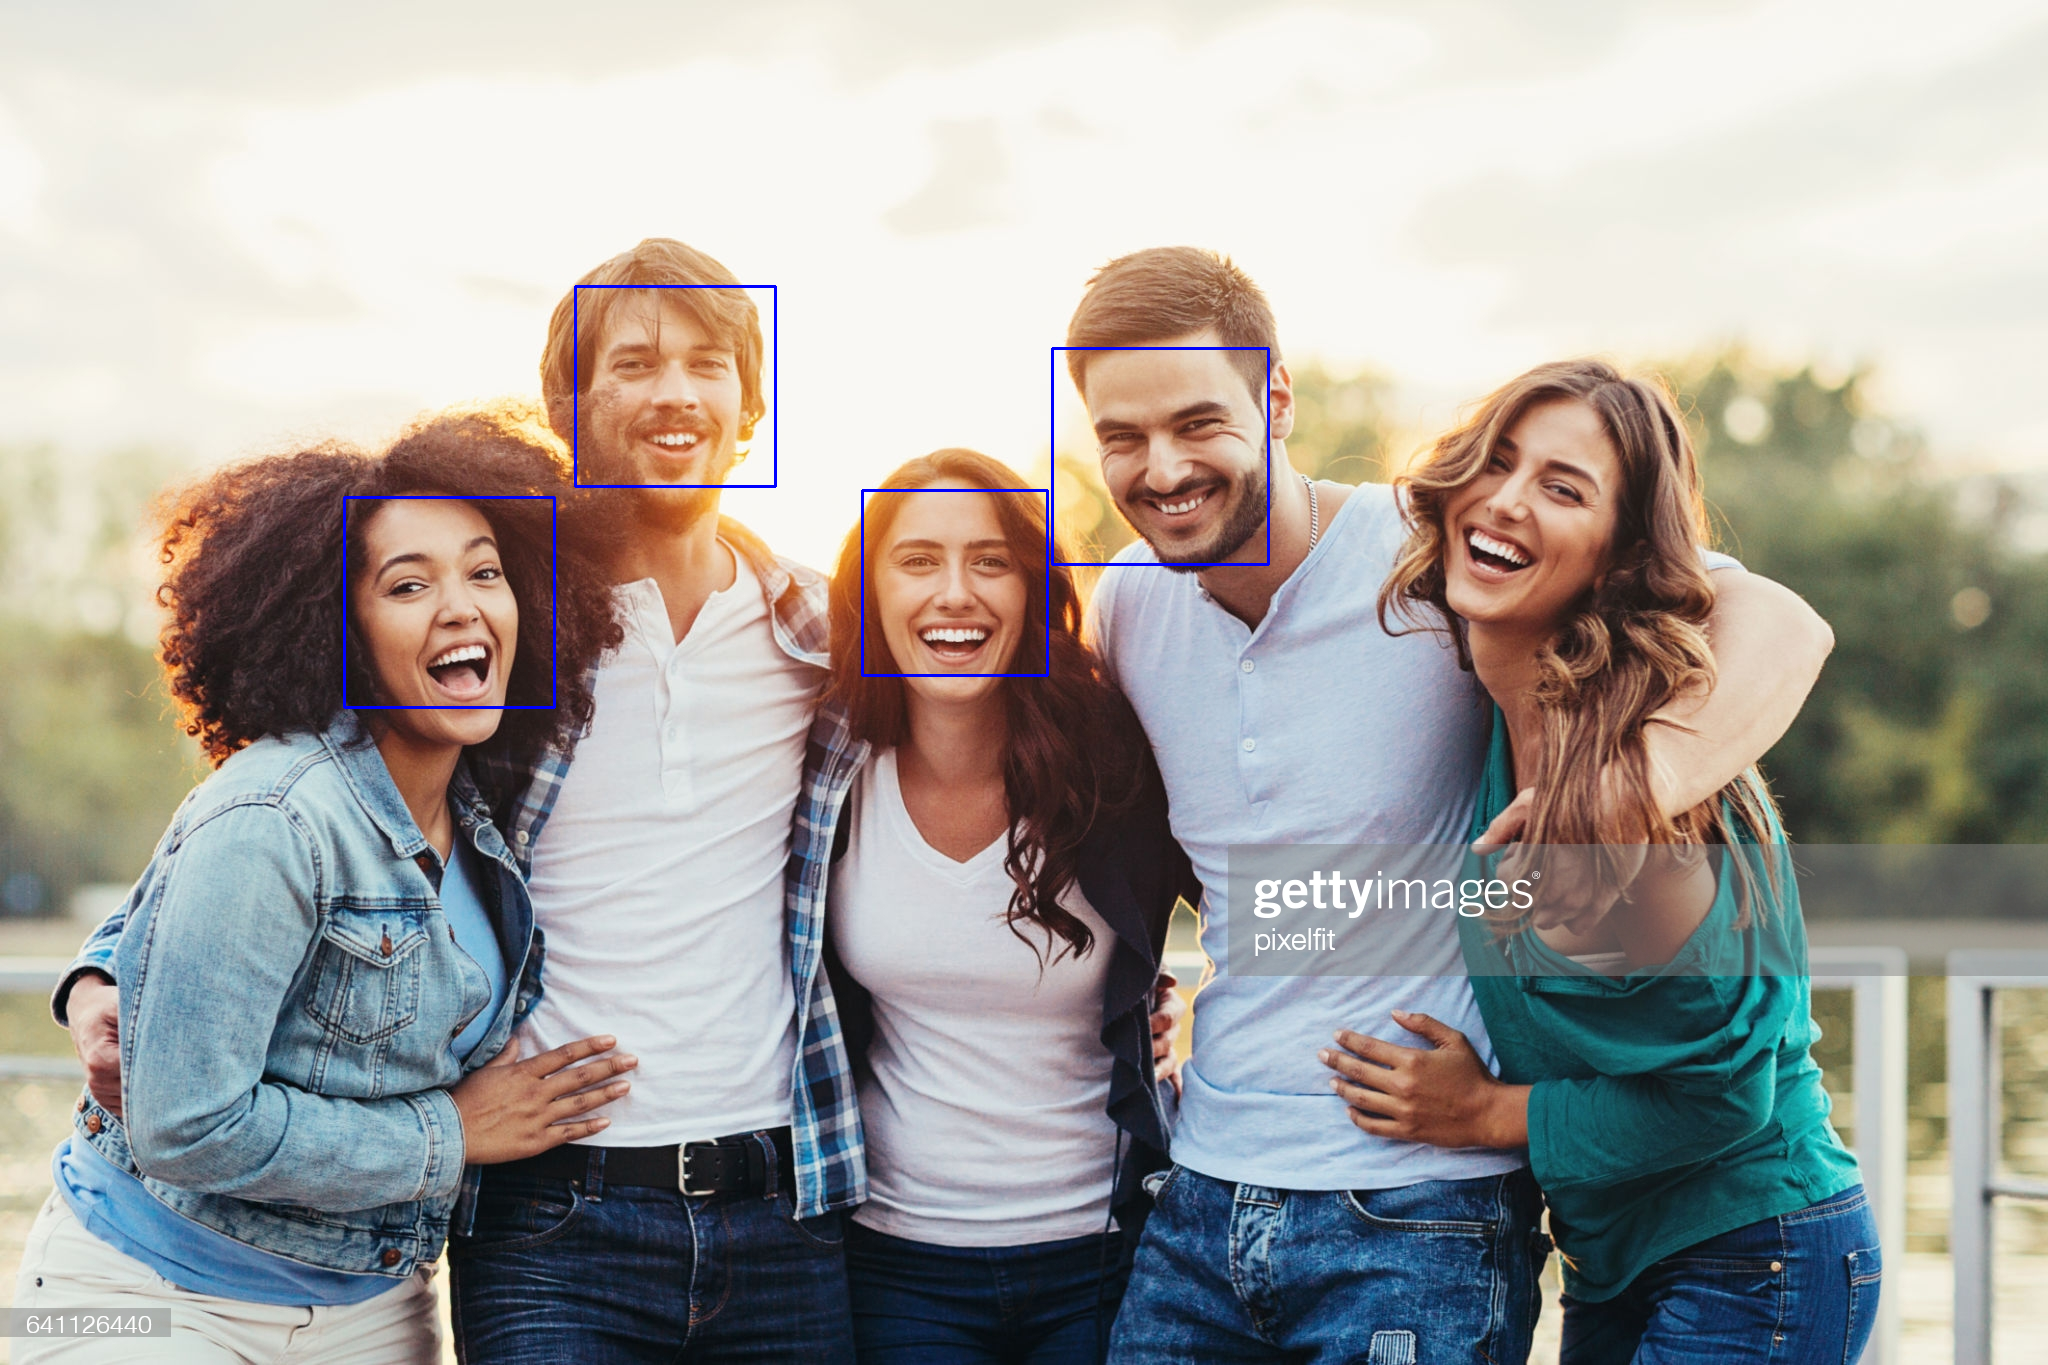

In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img=cv2.imread('/content/friends_img.jpg')

# img=cv2.resize(img,(0, 0), fx = 0.4, fy = 0.4)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces=face_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=10)

for (x,y,w,h) in faces:
    roi_gray=gray[y:y+h,x:x+w]
    color=(255,0,0)
    stroke=2
    cv2.rectangle(img,(x,y),(x+w,y+h),color,stroke)

cv2_imshow(img)

## Multitask cascade CNN for image

In [46]:
# MTCNN is capable of also recognizing other facial features such as eyes and mouth, called landmark detection
# The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid),
     #  then the first model (Proposal Network or P-Net) proposes candidate facial regions, 
       #    the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.

# Advantages: 1. it provides a top-performing pre-trained model, 2. is that it can be installed as a library ready for use in own code.

In [10]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 8.2MB/s 


In [11]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: opencv-python, keras
Required-by: 


In [13]:
import mtcnn
from mtcnn.mtcnn import MTCNN

In [33]:
img=cv2.imread('/content/friends_img.jpg')
detector=MTCNN()
faces=detector.detect_faces(img)
for face in faces:
  print(face)

{'box': [872, 489, 154, 209], 'confidence': 0.9999912977218628, 'keypoints': {'left_eye': (921, 563), 'right_eye': (989, 564), 'nose': (956, 601), 'mouth_left': (915, 633), 'mouth_right': (993, 635)}}
{'box': [1082, 347, 180, 207], 'confidence': 0.999778687953949, 'keypoints': {'left_eye': (1123, 436), 'right_eye': (1201, 424), 'nose': (1158, 481), 'mouth_left': (1140, 511), 'mouth_right': (1211, 499)}}
{'box': [584, 295, 154, 195], 'confidence': 0.9994575381278992, 'keypoints': {'left_eye': (636, 369), 'right_eye': (707, 366), 'nose': (678, 400), 'mouth_left': (639, 439), 'mouth_right': (707, 439)}}
{'box': [345, 498, 169, 232], 'confidence': 0.9991890788078308, 'keypoints': {'left_eye': (407, 588), 'right_eye': (482, 577), 'nose': (467, 614), 'mouth_left': (423, 669), 'mouth_right': (492, 660)}}
{'box': [1456, 403, 162, 203], 'confidence': 0.9958964586257935, 'keypoints': {'left_eye': (1495, 467), 'right_eye': (1566, 493), 'nose': (1497, 507), 'mouth_left': (1464, 536), 'mouth_right'

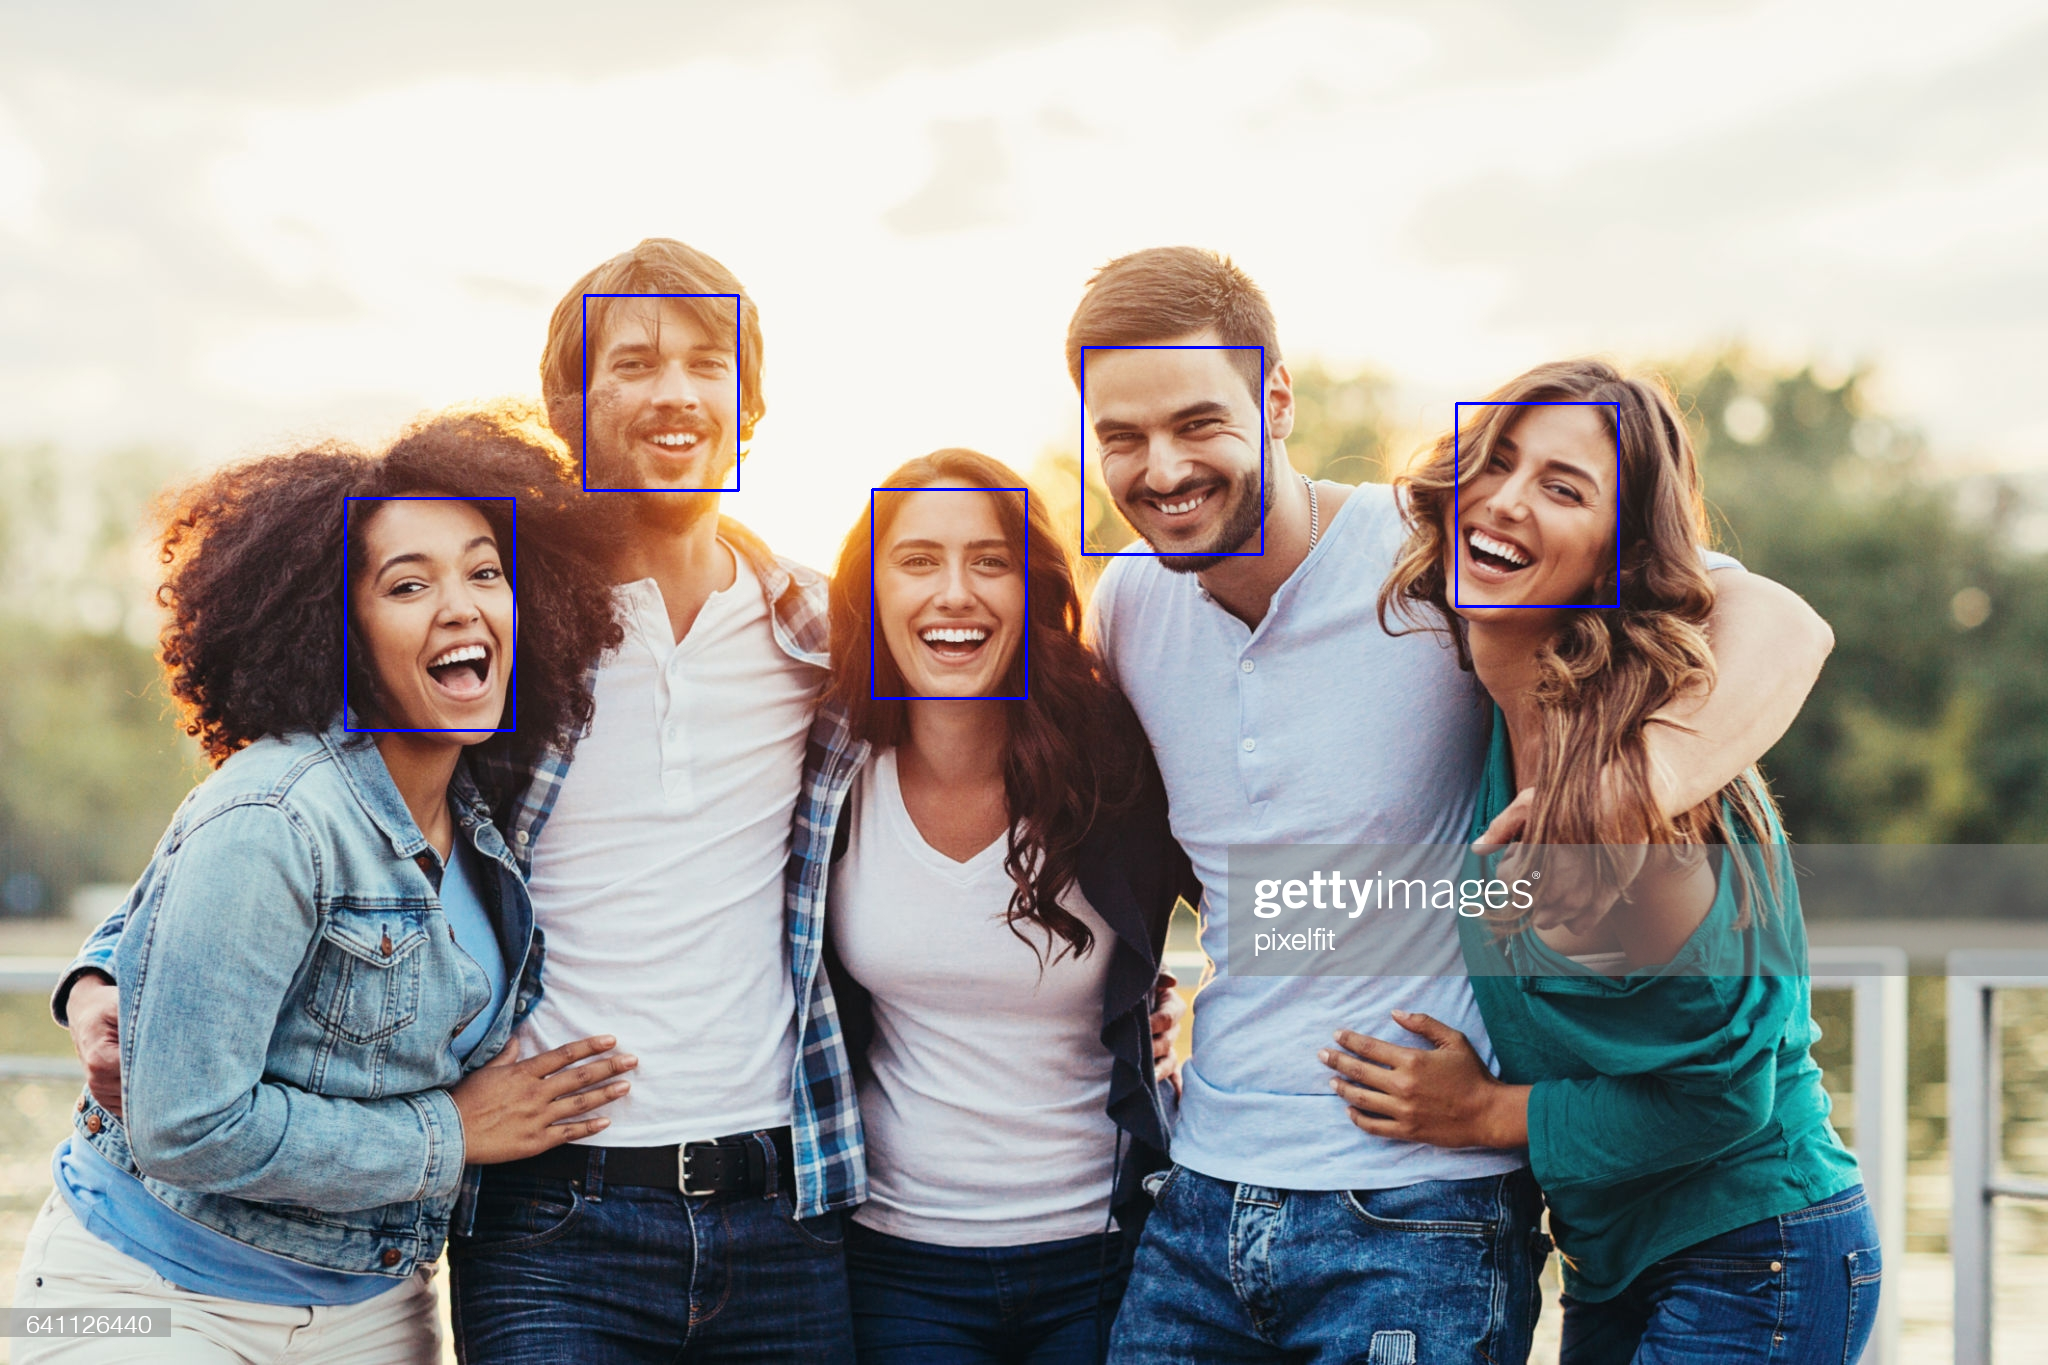

In [34]:
for face in faces:
  x,y,w,h=face['box']
  cv2.rectangle(img,(x,y),(x+w,y+h),color=(255,0,0),thickness=2)
  # for key, value in face['keypoints'].items():
	# 		cv2.circle(img,value, radius=2, color=(255,0,0),thickness=2)

cv2_imshow(img)